In [37]:
import math as math
from math import sqrt, pi, exp, sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import matplotlib as mpl
from scipy.integrate import tplquad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [38]:
%matplotlib inline

## Spin-1 impurity, in-plane, parallel to the x-axis, Delta=5

In [39]:
def G1to0integrand(phi,phi2,eps,mu,T,V,delta):
    return eps*(eps-delta)/(1.0+exp((eps-V*cos(phi)-mu)/T))*(1.0-1.0/(1.0+exp((eps-delta-V*cos(phi2)-mu)/T)))*(sin(phi/2))**2*(cos(phi2/2))**2

def G0to1integrand(phi,phi2,eps,mu,T,V,delta):
    return eps*(eps+delta)/(1.0+exp((eps-V*cos(phi)-mu)/T))*(1.0-1.0/(1.0+exp((eps+delta-V*cos(phi2)-mu)/T)))*(sin(phi2/2))**2*(cos(phi/2))**2

def Gminus1to0integrand(phi,phi2,eps,mu,T,V,delta):
    return eps*(eps-delta)/(1.0+exp((eps-V*cos(phi)-mu)/T))*(1.0-1.0/(1.0+exp((eps-delta-V*cos(phi2)-mu)/T)))*(sin(phi2/2))**2*(cos(phi/2))**2

def G0tominus1integrand(phi,phi2,eps,mu,T,V,delta):
    return eps*(eps+delta)/(1.0+exp((eps-V*cos(phi)-mu)/T))*(1.0-1.0/(1.0+exp((eps+delta-V*cos(phi2)-mu)/T)))*(sin(phi/2))**2*(cos(phi2/2))**2

def G1to0(mu,T,V,delta):
    return tplquad(G1to0integrand, 0, 500, lambda x: 0, lambda x: 2*np.pi, lambda x,y: 0, lambda x,y: 2*np.pi, args=(mu,T,V,delta))[0]

def G0to1(mu,T,V,delta):
    return tplquad(G0to1integrand, 0, 500, lambda x: 0, lambda x: 2*np.pi, lambda x,y: 0, lambda x,y: 2*np.pi, args=(mu,T,V,delta))[0]

def Gminus1to0(mu,T,V,delta):
    return tplquad(Gminus1to0integrand, 0, 500, lambda x: 0, lambda x: 2*np.pi, lambda x,y: 0, lambda x,y: 2*np.pi, args=(mu,T,V,delta))[0]

def G0tominus1(mu,T,V,delta):
    return tplquad(G0tominus1integrand, 0, 500, lambda x: 0, lambda x: 2*np.pi, lambda x,y: 0, lambda x,y: 2*np.pi, args=(mu,T,V,delta))[0]

In [40]:
V1=0;
V2=10;
nV=100;
Vvec=np.linspace(V1,V2,nV)

## Transition rates

In [ ]:
%%time
spin1G1to0=np.zeros(nV)
for i in range(0,nV):
    spin1G1to0[i]=G1to0(100,1,Vvec[i],5)
    
spin1G0to1=np.zeros(nV)
for i in range(0,nV):
    spin1G0to1[i]=G0to1(100,1,Vvec[i],5)
    
spin1Gminus1to0=np.zeros(nV)
for i in range(0,nV):
    spin1Gminus1to0[i]=Gminus1to0(100,1,Vvec[i],5)
    
spin1G0tominus1=np.zeros(nV)
for i in range(0,nV):
    spin1G0tominus1[i]=G0tominus1(100,1,Vvec[i],5)

In [9]:
spin1G1to0.tofile("spin1G1to0.txt", sep=" ", format="%s")
spin1G0to1.tofile("spin1G0to1.txt", sep=" ", format="%s")
spin1Gminus1to0.tofile("spin1Gminus1to0.txt", sep=" ", format="%s")
spin1G0tominus1.tofile("spin1G0tominus1.txt", sep=" ", format="%s")

In [41]:
spin1G1to0=np.loadtxt('spin1G1to0.txt')
spin1G0to1=np.loadtxt('spin1G0to1.txt')
spin1Gminus1to0=np.loadtxt('spin1Gminus1to0.txt')
spin1G0tominus1=np.loadtxt('spin1G0tominus1.txt')

### Evolution of the transition rates

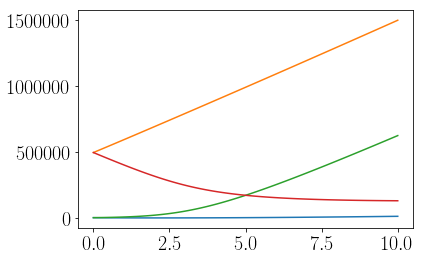

In [42]:
plt.plot(Vvec,spin1G1to0)
plt.plot(Vvec,spin1G0to1)
plt.plot(Vvec,spin1Gminus1to0)
plt.plot(Vvec,spin1G0tominus1)

In [17]:
spin1p1=spin1G0to1*spin1Gminus1to0/(spin1G0tominus1*spin1G1to0+spin1G0to1*spin1Gminus1to0+spin1G1to0*spin1Gminus1to0)

In [18]:
spin1p0=spin1G1to0*spin1Gminus1to0/(spin1G0tominus1*spin1G1to0+spin1G0to1*spin1Gminus1to0+spin1G1to0*spin1Gminus1to0)

In [19]:
spin1pminus1=spin1G0tominus1*spin1G1to0/(spin1G0tominus1*spin1G1to0+spin1G0to1*spin1Gminus1to0+spin1G1to0*spin1Gminus1to0)

### Stationary probabilities

In [20]:
plt.show()

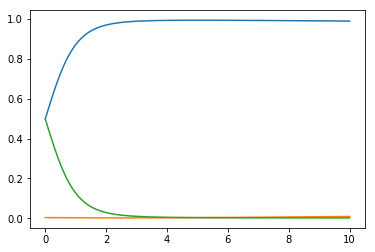

In [21]:
plt.plot(Vvec,spin1p1)
plt.plot(Vvec,spin1p0)
plt.plot(Vvec,spin1pminus1)

In [22]:
plt.rcParams['text.usetex'] = True #in order to use the actual tex, not the in-built matplotlib version
plt.rc('font', family='serif')

(-0.01, 1.01)

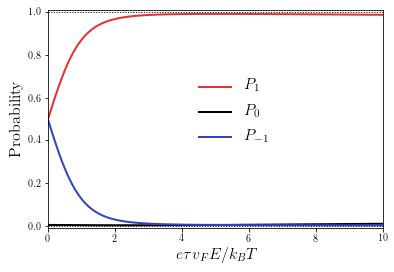

In [23]:
Px2=np.arange(0,20.2,0.2)
plt.plot([p for p in Vvec], [p for p in spin1p1],color='#e53131',linestyle='-',linewidth=2,label='$P_{1}$')
plt.plot([p for p in Vvec], [p for p in spin1p0],color='black',linestyle='-',linewidth=2,label='$P_{0}$')
plt.plot([p for p in Vvec], [p for p in spin1pminus1],color='#3044c3',linestyle='-',linewidth=2,label='$P_{-1}$')
plt.plot(Px2,0*Px2+1.0,'k:',linewidth=1.0)
plt.plot(Px2,0*Px2+0.0,'k:',linewidth=1.0)
plt.xlabel(r'$e\tau v_F E/k_BT$',fontsize=16)
plt.ylabel('Probability',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.xlim([0,10])
plt.legend(bbox_to_anchor=(0.7, 0.75),fontsize=16,frameon=False)
plt.ylim([-0.01,1.01])
#plt.savefig('spin1.pdf',bbox_inches='tight',dpi=1000)

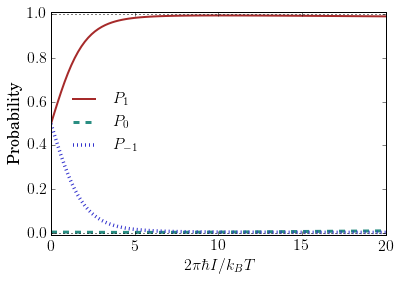

In [123]:
V1=0;
V2=20;
nV=100;
Vvec=np.linspace(V1,V2,nV)
Px2=np.arange(0,20.2,0.2)
plt.plot([p for p in Vvec], [p for p in spin1p1],color='#A62A2A',linestyle='-',linewidth=2,label='$P_{1}$')
plt.plot([p for p in Vvec], [p for p in spin1p0],color='#2A8E82',linestyle='--',linewidth=3,label='$P_{0}$')
plt.plot([p for p in Vvec], [p for p in spin1pminus1],color='#3232CD',linestyle=':',linewidth=3.5,label='$P_{-1}$')
plt.plot(Px2,0*Px2+1.0,'k:',linewidth=1.0)
plt.plot(Px2,0*Px2+0.0,'k:',linewidth=1.0)
plt.xlabel(r'$2\pi\hbar I/k_BT$',fontsize=16)
plt.ylabel('Probability',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.xlim([0,20])
plt.legend(bbox_to_anchor=(0.3, 0.7),fontsize=16,frameon=False)
plt.ylim([-0.01,1.01])
plt.savefig('spin1_probs.svg',bbox_inches='tight',dpi=1000)

## Zoom-in

(0.989, 0.994)

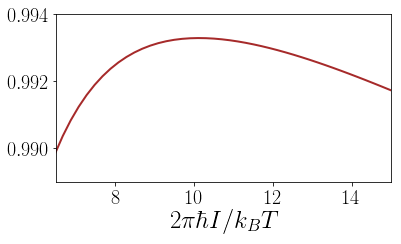

In [25]:
fig = plt.figure()
V1=0;
V2=20;
nV=100;
Vvec=np.linspace(V1,V2,nV)
Px2=np.arange(0,20.2,0.2)
plt.plot([p for p in Vvec], [p for p in spin1p1],color='#A62A2A',linestyle='-',linewidth=2)
plt.plot(Px2,0*Px2+1.0,'k:',linewidth=1.0)
plt.plot(Px2,0*Px2+0.0,'k:',linewidth=1.0)
plt.xlabel(r'$2\pi\hbar I/k_BT$',fontsize=25)
#plt.ylabel('Probability',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
ax = fig.gca()
ax.set_aspect(0.5*8.5/0.005)
plt.xlim([6.5,15])
plt.ylim([0.989,0.994])
#plt.savefig('zoom.png',bbox_inches='tight',dpi=600)

In [36]:
np.max(spin1p1)

0.99329617129714975

In [38]:
np.argmax(spin1p1)

50

## Spin-1/2 impurity

In [44]:
Pup=np.loadtxt('Pup.txt')
Pdown=np.loadtxt('Pdown.txt')

In [45]:
Pdown=np.ones(71)-Pup
Px=np.arange(0,7.1,0.1)
x=np.arange(0, 7, 0.01)
x1=np.arange(0, 4*3*pi**2/64, 0.01)
x2=np.arange(4*3*pi**2/64, 7, 0.01)

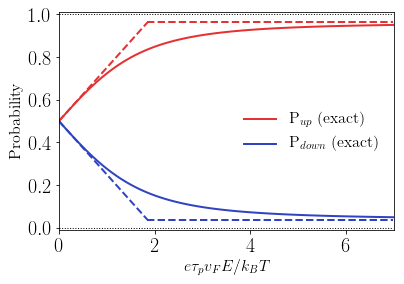

In [46]:
#plt.gca().set_aspect(1450/13*20/19)
plt.plot([p for p in Px], [p for p in Pup],color='#e53131',linestyle='-',linewidth=2,label='P$_{up}$ (exact)')
plt.plot([p for p in Px], [p for p in Pdown],color='#3044c3',linestyle='-',linewidth=2,label='P$_{down}$ (exact)')
plt.plot(x,0*x+1.0,'k:',linewidth=1.0)
plt.plot(x,0*x+0.0,'k:',linewidth=1.0)
plt.plot(x1,0.25*x1+0.5,color='#e53131',linestyle='--',linewidth=2)
plt.plot(x1,-0.25*x1+0.5,color='#3044c3',linestyle='--',linewidth=2)
plt.plot(x2,0.0*x2+0.5+3*pi**2/64,color='#e53131',linestyle='--',linewidth=2)
plt.plot(x2,0.0*x2+0.5-3*pi**2/64,color='#3044c3',linestyle='--',linewidth=2)
plt.xlabel(r'$e\tau_p v_F E/k_BT$',fontsize=16)
plt.ylabel('Probability',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.xlim([0,7])
plt.legend(bbox_to_anchor=(1, 0.61),fontsize=16,frameon=False)
plt.ylim([-0.01,1.01])
plt.show()
#plt.savefig('switching_halfspin_vF.svg')

## Molecule with spin 3/2

In [47]:
P3half=np.loadtxt('P3half.txt')
P1half=np.loadtxt('P1half.txt')
P1halfminus=np.loadtxt('P1halfminus.txt')
P3halfminus=np.loadtxt('P3halfminus.txt')

(-0.01, 1.01)

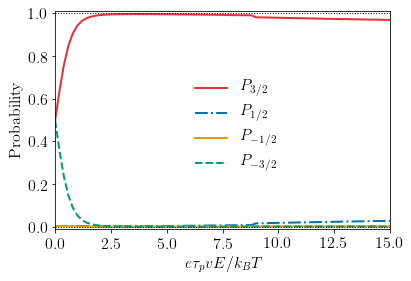

In [48]:
#plt.gca().set_aspect(1450/13*20/19)
Px2=np.arange(0,20.2,0.2)
plt.plot([p for p in Px2], [p for p in P3half],color='#e53131',linestyle='-',linewidth=2,label='$P_{3/2}$')
plt.plot([p for p in Px2], [p for p in P1half],color='#0072B2',linestyle='-.',linewidth=2,label='$P_{1/2}$')
plt.plot([p for p in Px2], [p for p in P1halfminus],color='#E69F00',linestyle='-',linewidth=2,label='$P_{-1/2}$')
plt.plot([p for p in Px2], [p for p in P3halfminus],color='#009E73',linestyle='--',linewidth=2,label='$P_{-3/2}$')
plt.plot(Px2,0*Px2+1.0,'k:',linewidth=1.0)
plt.plot(Px2,0*Px2+0.0,'k:',linewidth=1.0)
plt.xlabel(r'$e\tau_p v E/k_BT$',fontsize=16)
plt.ylabel('Probability',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.xlim([0,15])
plt.legend(bbox_to_anchor=(0.7, 0.75),fontsize=16,frameon=False)
plt.ylim([-0.01,1.01])
#plt.savefig('switching_3half.svg',bbox_inches='tight')

## Sketch of the Fermi surface

In [49]:
def FermiDirac(eps,mu,V,kT):
    return 1.0/(1.0+exp((eps-mu-V)/kT))

In [50]:
FD=np.vectorize(FermiDirac)
xpos=np.linspace(0,100,1000)
xneg=np.linspace(-100,0,1000)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

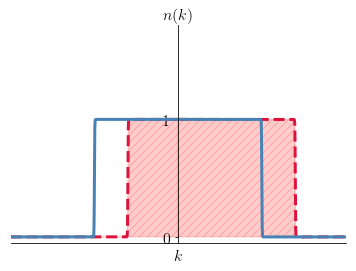

In [108]:
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1, sharex=True)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

yVpos=FD(xpos,50,20,0.1)
yVneg=FD(-xneg,50,-20,0.1)

plt.plot(xpos,FD(xpos,50,20,0.1),color='crimson',linestyle='--',linewidth=3)
plt.plot(xneg,FD(-xneg,50,-20,0.1),color='crimson',linestyle='--',linewidth=3)
plt.plot(xpos,FD(xpos,50,0,0.1),color='steelblue',linestyle='-',linewidth=3)
plt.plot(xneg,FD(-xneg,50,0,0.1),color='steelblue',linestyle='-',linewidth=3)
plt.xlabel(r'$k$',fontsize=16)
plt.title(r'$n(k)$',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(np.arange(min(x), max(x)+1, 1.0))
ax.fill_between(xpos, 0, yVpos, color='red', edgecolor='crimson',alpha=0.2,hatch='///')
ax.fill_between(xneg, 0, yVneg, color='red', edgecolor='crimson',alpha=0.2,hatch='///')
plt.xlim([-100,100])
plt.legend(bbox_to_anchor=(1, 0.61),fontsize=16,frameon=False)
plt.ylim([-0.05,1.8])
plt.savefig('distribution_sketch.svg',bbox_inches='tight')

No handles with labels found to put in legend.


(-0.05, 1.8)

<Figure size 432x288 with 0 Axes>

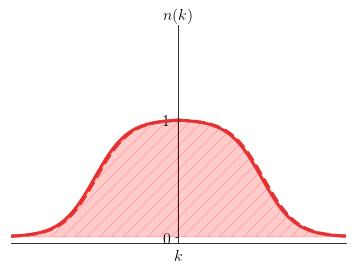

In [111]:
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1, sharex=True)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

yVpos=FD(xpos,50,1,10)
yVneg=FD(-xneg,50,-1,10)

plt.plot(xpos,FD(xpos,50,1,10),color='#e53131',linestyle='--',linewidth=3)
plt.plot(xneg,FD(-xneg,50,-1,10),color='#e53131',linestyle='--',linewidth=3)
plt.plot(xpos,FD(xpos,50,0,10),color='#e53131',linestyle='-',linewidth=3)
plt.plot(xneg,FD(-xneg,50,0,10),color='#e53131',linestyle='-',linewidth=3)
plt.xlabel(r'$k$',fontsize=16)
plt.title(r'$n(k)$',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.yticks(np.arange(min(x), max(x)+1, 1.0))
ax.fill_between(xpos, 0, yVpos, color='red', edgecolor='red',hatch="//",alpha=0.2)
ax.fill_between(xneg, 0, yVneg,color='red', edgecolor='red',hatch="//",alpha=0.2)
plt.xlim([-100,100])
plt.legend(bbox_to_anchor=(1, 0.61),fontsize=16,frameon=False)
plt.ylim([-0.05,1.8])

## Average magnetization

In [114]:
def prob(stot,s,theta):
    return 4*cos(theta)*(1-cos(theta))**(2*(stot-s))*(1+cos(theta))**(2*(stot+s))/((1+cos(theta))**(2*(2*stot+1))-(1-cos(theta))**(2*(2*stot+1)))

def aver_anis(stot,theta):
    s=np.arange(-S, S+1);
    return sum(prob(stot,s,theta)*s)/sum(prob(stot,s,theta))

In [115]:
S=5;
s=np.arange(-S, S+1);
n=1000000;

In [116]:
prob0=prob(S,s,0)
prob0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [142]:
probpi3=prob(S,s,pi/3)
probpi2=prob(S,s,pi/2)
probpi2=probpi2/sum(probpi2)
probpi23=prob(S,s,2*pi/3)
probpi4=prob(S,s,pi/4)
probpi4=probpi4/sum(probpi4)
probpi34=prob(S,s,3*pi/4)
probpi34=probpi34/sum(probpi34)
probpi=prob(S,s,pi)
probpi=probpi/sum(probpi)
probpi38=prob(S,s,3*pi/8)
probpi38=probpi38/sum(probpi38)
probpi58=prob(S,s,5*pi/8)
probpi58=probpi58/sum(probpi58)
probpi6=prob(S,s,pi/6)
probpi6=probpi6/sum(probpi6)
probpi56=prob(S,s,5*pi/6)
probpi56=probpi56/sum(probpi56)
probpi716=prob(S,s,7*pi/16)
probpi716=probpi716/sum(probpi716)
probpi916=prob(S,s,9*pi/16)
probpi916=probpi916/sum(probpi916)
probpi512=prob(S,s,5*pi/12)
probpi512=probpi512/sum(probpi512)
probpi712=prob(S,s,7*pi/12)
probpi712=probpi712/sum(probpi712)

In [143]:
diff=0.4*np.ones(np.size(s))

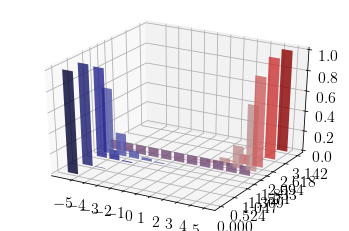

In [133]:
s2=-s-diff
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#for c, z in zip(['r', 'g', 'b', 'y'], [0, pi/3, pi/2, 2*pi/2]):
#    xs = s
#    ys = prob0

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
#    cs = [c] * len(xs)
#    cs[0] = 'c'
ax.bar(s2, prob0, zs=0, zdir='y', color='#000033', alpha=0.8,linewidth=0)
ax.bar(s2, probpi6, zs=pi/6, zdir='y', color='#191970', alpha=0.8,linewidth=0)
ax.bar(s2, probpi3, zs=pi/3, zdir='y', color='#23238E', alpha=0.8,linewidth=0)
ax.bar(s2, probpi512, zs=5*pi/12, zdir='y', color='#5959AB', alpha=0.85, linewidth=0)
ax.bar(s2, probpi2, zs=pi/2, zdir='y', color='#754C78', alpha=0.8,linewidth=0)
ax.bar(s2, probpi712, zs=7*pi/12, zdir='y', color='#BC8F8F', alpha=0.8,linewidth=0)
ax.bar(s2, probpi23, zs=2*pi/3, zdir='y', color='#CD5C5C', alpha=0.8,linewidth=0)
ax.bar(s2, probpi56, zs=5*pi/6, zdir='y', color='#CC3232', alpha=0.8,linewidth=0)
ax.bar(s2, probpi, zs=pi, zdir='y', color='#8B0000', alpha=0.8,linewidth=0)

#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#plt.xlabel(r'Spin $s$',fontsize=20)
#plt.zlabel(r'Probability to be in $|s\rangle$',fontsize=20)
plt.yticks([0,pi/6,pi/3,5*pi/12,pi/2,7*pi/12,2*pi/3,5*pi/6,pi])
plt.xticks(s)

plt.show()

## Ensemble average

In [137]:
ens_high=np.loadtxt('ensemble_high.txt')
ens_interm=np.loadtxt('ensemble_interm.txt')

In [138]:
spin = np.arange(1,11)
spin

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [139]:
ens_high_norm=ens_high/spin
ens_high_norm

array([0.3856705 , 0.42639206, 0.44597798, 0.45738489, 0.4648311 ,
       0.47006872, 0.47395147, 0.47694405, 0.47932071, 0.48125367])

In [140]:
ens_interm_norm=ens_interm/spin
ens_interm_norm

array([0.49897777, 0.49897777, 0.49897777, 0.49897777, 0.49897777,
       0.49897777, 0.49897777, 0.49897777, 0.49897777, 0.49897777])

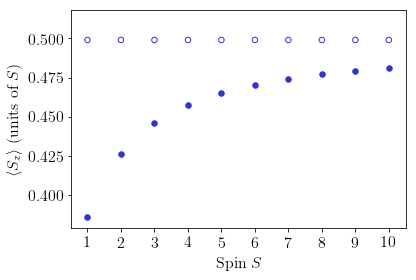

In [141]:
plt.scatter(spin,ens_interm_norm, s=30,facecolors='none', edgecolors='#3232CD')#2E0854
plt.scatter(spin,ens_high_norm,s=30, facecolors='#3232CD', edgecolors='#3232CD')
plt.xlabel('Spin $S$',fontsize=16)
plt.ylabel(r'$\langle S_z \rangle $ (units of $S$)',fontsize=16)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.xlim([0.5,10.5]);
#plt.ylim([0.98,1.001]);
plt.xticks([1,2,3,4,5,6,7,8,9,10],size=16);
#plt.xticks([1,2,3,4,5],['1','2','3'],size=20);